# K-Nearest Neighbour Implementation( Python )

## Classification

### Tools & Libraries
***
- **Pandas**( Data Analysis & Manipulation. )
- **Numpy**( Numerical Multidimensional Array, Matrices and Computation. )
- **Matplotlib**( Visualization )
- **Scikit-Learn**( ML  )

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Dataset
***
**Source :**
*UCI ( IRIS) Data Set*

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Reading dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

def data_info(daten):
    print('Shape :')
    print(daten.shape)
    print('\nHead :')
    print(daten.head())

data_info(dataset)

Shape :
(150, 5)

Head :
   sepal-length  sepal-width  petal-length  petal-width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


**Information :**

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other

**Attribute Information :**

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
    - Iris Setosa
    - Iris Versicolour
    - Iris Virginica
6. Predicted attribute : Class of iris plant 
   

### Preprocessing

***

<u>**Attribute-Label Split.**</u>

- Attribute set: $X$ with corresponding labels: $y$.
- [iloc - integer-location based indexing](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)

In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

<u>**Train-Test Split.**</u>

- 20%( Test ) & 80%( Train )

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print('\nTrain Data Shape :')
print(X_train.shape)

print('\nTest Data Shape :')
print(X_test.shape)


Train Data Shape :
(120, 4)

Test Data Shape :
(30, 4)


### Feature Scaling

***

*It is always a good practice to scale the features so that all of them can be uniformly evaluated*

> Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance 

@Wikipedia

The gradient descent algorithm also converges faster with normalized features

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Model

***

- Scikit-Learn( neighbors Library )
- KNeighborsClassifier( Class )

#### Training

- fit Method( class Regressor )

In [6]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

- This class is initialized with one parameter, i.e. n_neigbours( K = 5 )
- There is no ideal value for K and it is selected after testing and evaluation

#### Prediction

- predict Method( class Classifier )

In [7]:
y_pred = classifier.predict(X_test)

#### Evaluation

**Commonly used metrics :** confusion matrix, precision, recall & F1 score

- Scikit-Learn( metrics Library )
- confusion_matrix( evaluate Accuracy of a classification )
- classification_report( Methods )

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

print('\nConfusion Matrix :\n')
print(confusion_matrix(y_test, y_pred))

print('\n\nClassification Report :\n')
print(classification_report(y_test, y_pred))


Confusion Matrix :

[[11  0  0]
 [ 0  8  0]
 [ 0  3  8]]


Classification Report :

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.73      1.00      0.84         8
 Iris-virginica       1.00      0.73      0.84        11

      micro avg       0.90      0.90      0.90        30
      macro avg       0.91      0.91      0.89        30
   weighted avg       0.93      0.90      0.90        30



### Interpretation

The results show that our KNN algorithm was able to classify all the 30 records in the test with `100%` accuracy, but KNN doesn't always perform as well with high-dimensionality or categorical features.

### Comparing Error Rate with the K Value

During the training and prediction phases, there is no way to know beforehand which value of K that yields the best results in the first go.
- One way to find the best value of K is to plot the graph of K value and the corresponding error rate for the dataset.

- Let's plot the mean error for the predicted values of test set for all the K values between 1 and 40.

To do so, let's first calculate the mean of error for all the predicted values where K ranges from 1 and 40.

In [9]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

- In each iteration the mean error for predicted values is calculated.

Now, Let's plot the error values against K-Values

Text(0,0.5,'Mean Error')

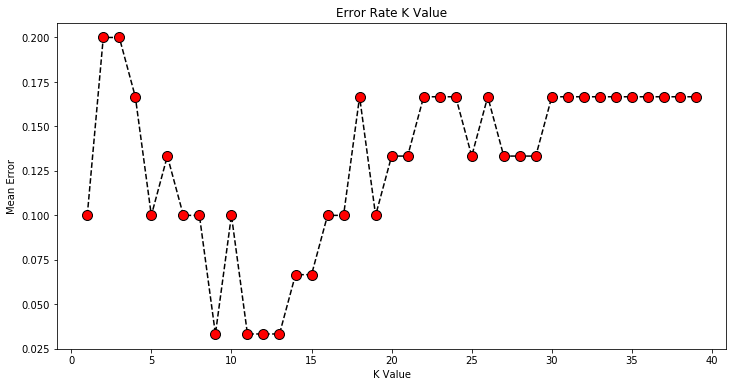

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='black', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

*The mean error is zero when the k i --- *

***